In [ ]:
from IPython.display import clear_output
import time
try:

    !pip install h5py
    #!pip install scikeras
    !pip install pandas
    !pip install Pillow
    !pip install matplotlib
    !pip install kaggle
    #!pip install sklearn
    !pip install tensorflow
    !pip install scikit-learn
    !pip install torch
    !pip install torchvision
    !pip install FCN
    time.sleep(5)
    clear_output()
    print("Packages successfully installed")

except:
    print("error installing packages")



Packages successfully installed


In [1]:
import h5py
import pandas as pd
import numpy as np
from PIL import Image
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
from torchsummary import summary
import cv2
from sklearn.model_selection import RepeatedKFold, cross_val_score
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
#from scikeras.wrappers import KerasClassifier, KerasRegressor

#from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import tensorflow as tf
import torch.nn.functional as F

In [2]:
!nvidia-smi

Thu Aug  1 01:08:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   52C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
#Brings in YOUR google drive directory, save data to google drive so that you
#dont have to download everytime

#Stopped using this as colab crashes if accessing your drive often, download
#data using cells below

#from google.colab import drive
#drive.mount('/content/drive',force_remount=True)

In [3]:
#move kaggle.json (API Token) to kaggle folder and make sure we can read and write
#upload your own kaggle.json api key to folder when you first load in
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json #read and write

!kaggle competitions download -c isic-2024-challenge

100% 2.00G/2.00G [01:32<00:00, 23.3MB/s]
100% 2.00G/2.00G [01:32<00:00, 23.1MB/s]


In [4]:
#unzip kaggle dataset
import zipfile

with zipfile.ZipFile('isic-2024-challenge.zip', 'r') as zip_ref:
    zip_ref.extractall('isic-2024-challenge')



In [5]:
#get 2020 data
!kaggle datasets download -d nischaydnk/isic-2020-jpg-256x256-resized


Dataset URL: https://www.kaggle.com/datasets/nischaydnk/isic-2020-jpg-256x256-resized
License(s): CC0-1.0
100% 594M/595M [00:29<00:00, 23.7MB/s]
100% 595M/595M [00:29<00:00, 21.2MB/s]


In [6]:
#unzip 2020
!unzip isic-2020-jpg-256x256-resized.zip -d isic-2020


Streaming output truncated to the last 5000 lines.
  inflating: isic-2020/train-image/image/ISIC_8513112.jpg  
  inflating: isic-2020/train-image/image/ISIC_8513649.jpg  
  inflating: isic-2020/train-image/image/ISIC_8514170.jpg  
  inflating: isic-2020/train-image/image/ISIC_8514989.jpg  
  inflating: isic-2020/train-image/image/ISIC_8515165.jpg  
  inflating: isic-2020/train-image/image/ISIC_8515281.jpg  
  inflating: isic-2020/train-image/image/ISIC_8515582.jpg  
  inflating: isic-2020/train-image/image/ISIC_8515674.jpg  
  inflating: isic-2020/train-image/image/ISIC_8516181.jpg  
  inflating: isic-2020/train-image/image/ISIC_8516223.jpg  
  inflating: isic-2020/train-image/image/ISIC_8516516.jpg  
  inflating: isic-2020/train-image/image/ISIC_8516631.jpg  
  inflating: isic-2020/train-image/image/ISIC_8516659.jpg  
  inflating: isic-2020/train-image/image/ISIC_8516922.jpg  
  inflating: isic-2020/train-image/image/ISIC_8517305.jpg  
  inflating: isic-2020/train-image/image/ISIC_851

In [7]:
#get 2019 data
!kaggle datasets download -d nischaydnk/isic-2019-jpg-224x224-resized


Dataset URL: https://www.kaggle.com/datasets/nischaydnk/isic-2019-jpg-224x224-resized
License(s): CC0-1.0
100% 355M/355M [00:20<00:00, 22.3MB/s]
100% 355M/355M [00:20<00:00, 17.7MB/s]


In [8]:
#unzip 2019 data
!unzip isic-2019-jpg-224x224-resized.zip -d isic-2019


Streaming output truncated to the last 5000 lines.
  inflating: isic-2019/train-image/image/ISIC_0065357.jpg  
  inflating: isic-2019/train-image/image/ISIC_0065358.jpg  
  inflating: isic-2019/train-image/image/ISIC_0065359.jpg  
  inflating: isic-2019/train-image/image/ISIC_0065360.jpg  
  inflating: isic-2019/train-image/image/ISIC_0065361.jpg  
  inflating: isic-2019/train-image/image/ISIC_0065362.jpg  
  inflating: isic-2019/train-image/image/ISIC_0065366.jpg  
  inflating: isic-2019/train-image/image/ISIC_0065367.jpg  
  inflating: isic-2019/train-image/image/ISIC_0065368.jpg  
  inflating: isic-2019/train-image/image/ISIC_0065370.jpg  
  inflating: isic-2019/train-image/image/ISIC_0065371.jpg  
  inflating: isic-2019/train-image/image/ISIC_0065372.jpg  
  inflating: isic-2019/train-image/image/ISIC_0065374.jpg  
  inflating: isic-2019/train-image/image/ISIC_0065376.jpg  
  inflating: isic-2019/train-image/image/ISIC_0065377.jpg  
  inflating: isic-2019/train-image/image/ISIC_006

In [9]:
#get 2017 from dropbox

!wget -O isic-2017-data.zip "https://www.dropbox.com/scl/fo/2l5mv1nos7mqxgdye1h4d/AIvWnCYUGwrLchG1IXQWolw?rlkey=a8htwyc4lmbrxw23d1uho913u&st=n4ll6xvy&dl=0"

--2024-08-01 01:17:21--  https://www.dropbox.com/scl/fo/2l5mv1nos7mqxgdye1h4d/AIvWnCYUGwrLchG1IXQWolw?rlkey=a8htwyc4lmbrxw23d1uho913u&st=n4ll6xvy&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9375cc2136651c57b328303631.dl.dropboxusercontent.com/zip_download_get/B7KvoyeTQGHUd5LYp3JOtE5sb6yTranYO7nPywGPpreL_mB51ees97VuNZKs8fNJtz8c_BqL5RSqa7LsTw8nWbTTeHjM6-iU0295PfK-AanvQA# [following]
--2024-08-01 01:17:22--  https://uc9375cc2136651c57b328303631.dl.dropboxusercontent.com/zip_download_get/B7KvoyeTQGHUd5LYp3JOtE5sb6yTranYO7nPywGPpreL_mB51ees97VuNZKs8fNJtz8c_BqL5RSqa7LsTw8nWbTTeHjM6-iU0295PfK-AanvQA
Resolving uc9375cc2136651c57b328303631.dl.dropboxusercontent.com (uc9375cc2136651c57b328303631.dl.dropboxusercontent.com)... 162.125.81.15, 2620:100:6031:15::a27d:510f
Connecting to uc9375cc2136651c

In [11]:
#unzip 2017 data
!unzip isic-2017-data.zip -d isic-2017
!unzip "/content/isic-2017/ISIC2017_Training_Data.zip" -d isic-2017

Archive:  isic-2017-data.zip
mapname:  conversion of  failed
replace isic-2017/ISIC2017_Training_Data.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/isic-2017/ISIC2017_Training_Data.zip
   creating: isic-2017/ISIC2017_Training_Data/
  inflating: isic-2017/__MACOSX/._ISIC2017_Training_Data  
  inflating: isic-2017/ISIC2017_Training_Data/ISIC_0014630_superpixels.png  
  inflating: isic-2017/__MACOSX/ISIC2017_Training_Data/._ISIC_0014630_superpixels.png  
  inflating: isic-2017/ISIC2017_Training_Data/ISIC_0013762_superpixels.png  
  inflating: isic-2017/__MACOSX/ISIC2017_Training_Data/._ISIC_0013762_superpixels.png  
  inflating: isic-2017/ISIC2017_Training_Data/ISIC_0014850_superpixels.png  
  inflating: isic-2017/__MACOSX/ISIC2017_Training_Data/._ISIC_0014850_superpixels.png  
  inflating: isic-2017/ISIC2017_Training_Data/ISIC_0012526_superpixels.png  
  inflating: isic-2017/__MACOSX/ISIC2017_Training_Data/._ISIC_0012526_superpixels.png  
  inflating: isic-2017/ISIC2017_T

In [12]:
#get 2018 data from dropbox
!wget -O isic-2018-data.zip "https://www.dropbox.com/scl/fo/urxwy7ppjfamjtcjxy768/AMCr66RezW10M5V6BhVqu1A?rlkey=k77gjc735k9e3g6qghq1fv9i6&st=bkbsunu8&dl=0"

--2024-08-01 01:22:21--  https://www.dropbox.com/scl/fo/urxwy7ppjfamjtcjxy768/AMCr66RezW10M5V6BhVqu1A?rlkey=k77gjc735k9e3g6qghq1fv9i6&st=bkbsunu8&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uca62178117382e3efdc928c678e.dl.dropboxusercontent.com/zip_download_get/B7IRNWGqoJ47gNd7bVqravPbGszorznLCpwodEQZLftI7UEXcvmci4VQ1oZ76fzuO5GZTueKYwKWsOvD9gtwXwn_3EHtmVOGBUZp1nrDjnKP0A# [following]
--2024-08-01 01:22:22--  https://uca62178117382e3efdc928c678e.dl.dropboxusercontent.com/zip_download_get/B7IRNWGqoJ47gNd7bVqravPbGszorznLCpwodEQZLftI7UEXcvmci4VQ1oZ76fzuO5GZTueKYwKWsOvD9gtwXwn_3EHtmVOGBUZp1nrDjnKP0A
Resolving uca62178117382e3efdc928c678e.dl.dropboxusercontent.com (uca62178117382e3efdc928c678e.dl.dropboxusercontent.com)... 162.125.81.15, 2620:100:6031:15::a27d:510f
Connecting to uca62178117382e3

In [14]:
#unzip 2018 data
!unzip isic-2018-data.zip -d isic-2018
!unzip "/content/isic-2018/ISIC2018_Training_Data.zip" -d isic-2018

Streaming output truncated to the last 5000 lines.
  inflating: isic-2018/ISIC2018_Training_Data/ISIC_0028105.jpg  
  inflating: isic-2018/__MACOSX/ISIC2018_Training_Data/._ISIC_0028105.jpg  
  inflating: isic-2018/ISIC2018_Training_Data/ISIC_0033243.jpg  
  inflating: isic-2018/__MACOSX/ISIC2018_Training_Data/._ISIC_0033243.jpg  
  inflating: isic-2018/ISIC2018_Training_Data/ISIC_0033525.jpg  
  inflating: isic-2018/__MACOSX/ISIC2018_Training_Data/._ISIC_0033525.jpg  
  inflating: isic-2018/ISIC2018_Training_Data/ISIC_0028663.jpg  
  inflating: isic-2018/__MACOSX/ISIC2018_Training_Data/._ISIC_0028663.jpg  
  inflating: isic-2018/ISIC2018_Training_Data/ISIC_0027550.jpg  
  inflating: isic-2018/__MACOSX/ISIC2018_Training_Data/._ISIC_0027550.jpg  
  inflating: isic-2018/ISIC2018_Training_Data/ISIC_0031332.jpg  
  inflating: isic-2018/__MACOSX/ISIC2018_Training_Data/._ISIC_0031332.jpg  
  inflating: isic-2018/ISIC2018_Training_Data/ISIC_0033242.jpg  
  inflating: isic-2018/__MACOSX/ISIC20

In [15]:
#get 2017 and 2018 data from drobox link

#!wget -O isic-2017-2018-data.zip "https://www.dropbox.com/scl/fo/qno9olx5d4adegddqd3ft/ADCdzYxr1fTBFnZrDs7CEw4?rlkey=t5v4eotyhwrgsnrhfdoz4obg2&st=ht711fbx&dl=0"
#https://www.dropbox.com/scl/fo/qno9olx5d4adegddqd3ft/ADCdzYxr1fTBFnZrDs7CEw4?rlkey=t5v4eotyhwrgsnrhfdoz4obg2&st=ht711fbx&dl=0

In [16]:
#unzip 2017 and 2018 data

#import zipfile

#with zipfile.ZipFile('isic-2017-2018-data.zip', 'r') as zip_ref:
#    zip_ref.extractall('isic-2017-2018')

#!unzip isic-2017-2018-data.zip -d isic-2017-2018
#!unzip "/content/isic-2017-2018/ISIC2017_Training_Data.zip" -d isic-2017
#!unzip "/content/isic-2017-2018/ISIC2018_Training_Data.zip" -d isic-2018

In [17]:
#get 2016 data from dropbox

!wget -O isic-2016-data.zip "https://www.dropbox.com/scl/fo/4xvsv1goayuv7rf24ybe8/AF6de2WVOEsWJPT5fGPBZRc?rlkey=71zuqbd2akj639iu7yt43a2if&st=r61kft19&dl=0"
#https://www.dropbox.com/scl/fo/4xvsv1goayuv7rf24ybe8/AF6de2WVOEsWJPT5fGPBZRc?rlkey=71zuqbd2akj639iu7yt43a2if&st=r61kft19&dl=0

--2024-08-01 01:27:44--  https://www.dropbox.com/scl/fo/4xvsv1goayuv7rf24ybe8/AF6de2WVOEsWJPT5fGPBZRc?rlkey=71zuqbd2akj639iu7yt43a2if&st=r61kft19&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1361784533a7ca49451ba04801.dl.dropboxusercontent.com/zip_download_get/B7JN9kp7szDjt1u6iomgunLtWzl2OennE1kXxVNn-DD9g6qDxeIJqW0GcQfB0zMCvYHevfGt89mcld4LaFFHhEUPhZBykVQReivX8_HrRtZbgQ# [following]
--2024-08-01 01:27:46--  https://uc1361784533a7ca49451ba04801.dl.dropboxusercontent.com/zip_download_get/B7JN9kp7szDjt1u6iomgunLtWzl2OennE1kXxVNn-DD9g6qDxeIJqW0GcQfB0zMCvYHevfGt89mcld4LaFFHhEUPhZBykVQReivX8_HrRtZbgQ
Resolving uc1361784533a7ca49451ba04801.dl.dropboxusercontent.com (uc1361784533a7ca49451ba04801.dl.dropboxusercontent.com)... 162.125.81.15, 2620:100:6031:15::a27d:510f
Connecting to uc1361784533a7ca49

In [18]:
#unzip 2016 data

!unzip isic-2016-data.zip -d isic-2016
!unzip "/content/isic-2016/ISIC2016_Training_Data.zip" -d isic-2016
#!unzip "/content/isic-2017-2018/ISIC2018_Training_Data.zip" -d isic-2018

Archive:  isic-2016-data.zip
mapname:  conversion of  failed
 extracting: isic-2016/ISIC2016_Training_Data.zip  
 extracting: isic-2016/ISBI2016_Training_labels.csv  
Archive:  /content/isic-2016/ISIC2016_Training_Data.zip
   creating: isic-2016/ISIC2016_Training_Data/
  inflating: isic-2016/__MACOSX/._ISIC2016_Training_Data  
  inflating: isic-2016/ISIC2016_Training_Data/ISIC_0000025.jpg  
  inflating: isic-2016/__MACOSX/ISIC2016_Training_Data/._ISIC_0000025.jpg  
  inflating: isic-2016/ISIC2016_Training_Data/ISIC_0010236.jpg  
  inflating: isic-2016/__MACOSX/ISIC2016_Training_Data/._ISIC_0010236.jpg  
  inflating: isic-2016/ISIC2016_Training_Data/ISIC_0011128.jpg  
  inflating: isic-2016/__MACOSX/ISIC2016_Training_Data/._ISIC_0011128.jpg  
  inflating: isic-2016/ISIC2016_Training_Data/ISIC_0000031.jpg  
  inflating: isic-2016/__MACOSX/ISIC2016_Training_Data/._ISIC_0000031.jpg  
  inflating: isic-2016/ISIC2016_Training_Data/ISIC_0010222.jpg  
  inflating: isic-2016/__MACOSX/ISIC2016_T

In [19]:
# This function from https://www.kaggle.com/competitions/isic-2024-challenge/discussion/519735
def remove_hair(image):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
        blackhat = cv2.morphologyEx(gray,cv2.MORPH_BLACKHAT,kernel)

        _, thresh = cv2.threshold(blackhat, 10 ,255, cv2.THRESH_BINARY)
        inpainted_image = cv2.inpaint(image, thresh, 1, cv2.INPAINT_TELEA)
        return inpainted_image

(768, 1024, 3)


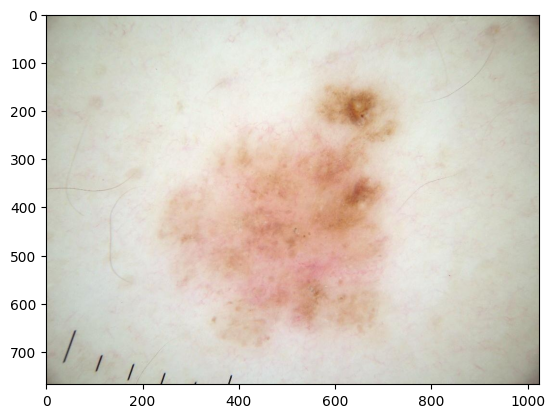

In [20]:
#test_images["ISIC_0015740"]
test_images_path = "/content/drive/MyDrive/cse151a-group-project/isic-2024-challenge/train-image/image/ISIC_3723665.jpg"
test_images_path2 = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2017/ISIC2017_Training_Data/ISIC_0000004.jpg"

test_image_path3 = "/content/isic-2020/train-image/image/ISIC_0015719.jpg"
test_image_path4 = '/content/isic-2019/train-image/image/ISIC_0000001.jpg'
test_image_path5 ="/content/isic-2017/ISIC2017_Training_Data/ISIC_0010043.jpg"

test_image = cv2.imread(test_image_path5)
print(test_image.shape)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_image)
plt.show()


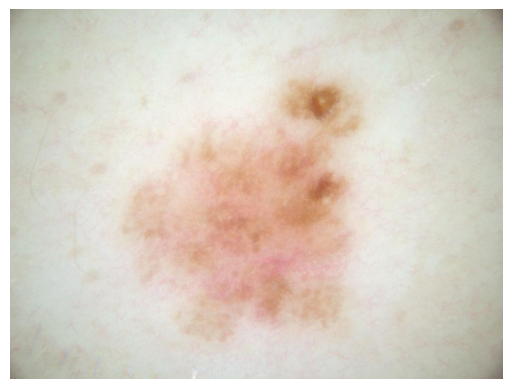

In [21]:
#plt.imshow(remove_hair(np.array(test_images["ISIC_0015740"])))
plt.imshow(remove_hair(np.array(test_image)))
plt.axis('off')
plt.show()

## Data Loading

In [22]:
#updated paths for kaggle and dropbox download of ISIC datasets
path_2024_train_csv = "/content/isic-2024-challenge/train-metadata.csv"

path_2020_train_csv = "/content/isic-2020/train-metadata.csv"

path_2019_train_csv = "/content/isic-2019/train-metadata.csv"

#path_2018_train_csv = "/content/isic-2017-2018/ISIC2018_Training_labels.csv"
path_2018_train_csv = "/content/isic-2018/ISIC2018_Training_labels.csv"

#path_2017_train_csv = "/content/isic-2017-2018/ISIC2017_Training_labels.csv"
path_2017_train_csv = "/content/isic-2017/ISIC2017_Training_labels.csv"

path_2016_train_csv = "/content/isic-2016/ISBI2016_Training_labels.csv"

In [ ]:
#Not using google drive anymore
#path to ISIC 2024 dataset on my google drive
#google_drive_path ="/content/drive/MyDrive/cse151a-group-project/isic-2024-challenge/train-image/image"
google_drive_path ="/content/drive/MyDrive/cse151a-group-project/isic-2024-challenge/train-metadata.csv"

isic_2020_path = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2020/ISIC2020_Training_labels.csv"

isic_2019_path = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2019/ISIC2019_Training_labels.csv"

isic_2018_path = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2018/ISIC2018_Training_labels.csv"

isic_2017_path = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2017/ISIC2017_Training_labels.csv"


isic_2016_path = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2016/ISBI2016_Training_labels.csv"

In [23]:
isic_2020 = pd.read_csv(path_2020_train_csv) #kaggle (colab runtime) download path
#isic_2020 = pd.read_csv(isic_2020_path) #google drive path
print(isic_2020.head())
#isic_2020 = isic_2020[['image_name','target']] #for google drive
isic_2020 = isic_2020[['isic_id','target']] #for kaggle
#isic_2020
print(isic_2020['target'].value_counts())

target_1_2020 = isic_2020[isic_2020['target']==1].sample(n=584,random_state=42)
#target_1_2020.rename(columns={'image_name':'isic_id'},inplace=True) #for drive
display(target_1_2020.shape)
display(target_1_2020.head())

   Unnamed: 0       isic_id  patient_id  target
0           0  ISIC_2637011  IP_7279968       0
1           1  ISIC_0015719  IP_3075186       0
2           2  ISIC_0052212  IP_2842074       0
3           3  ISIC_0068279  IP_6890425       0
4           4  ISIC_0074268  IP_8723313       0
target
0    32542
1      584
Name: count, dtype: int64


(584, 2)

,isic_id,target
22329,ISIC_6767569,1
24088,ISIC_7312977,1
5627,ISIC_1785627,1
26613,ISIC_8066110,1
29231,ISIC_8838753,1


In [24]:
#isic_2019 = pd.read_csv(isic_2019_path) #google drive
isic_2019 = pd.read_csv(path_2019_train_csv) #kaggle
#isic_2019 = isic_2019[['image','MEL']] #for google drive
isic_2019 = isic_2019[['isic_id','target']] #kaggle

#print(isic_2019['MEL'].value_counts()) #for google drive
print(isic_2019['target'].value_counts())

target_1_2019 = isic_2019[isic_2019['target']==1].sample(n=4522,random_state=42)#for kaggle
#target_1_2019 = isic_2019[isic_2019['MEL']==1].sample(n=4522,random_state=42) #for drive
#target_1_2019.rename(columns={'image':'isic_id','MEL':'target'},inplace=True) #for drive
display(target_1_2019.shape)
display(target_1_2019.head())

target
0    20809
1     4522
Name: count, dtype: int64


(4522, 2)

,isic_id,target
22503,ISIC_0068778,1
15900,ISIC_0058285,1
25288,ISIC_0073194,1
15717,ISIC_0058003,1
23357,ISIC_0070105,1


In [59]:
#isic_2018 = pd.read_csv(isic_2018_path) #google drive
isic_2018 = pd.read_csv(path_2018_train_csv) #dropbox

isic_2018 = isic_2018[['image','MEL']]
#isic_2020
print(isic_2018['MEL'].value_counts())

isic_2018['MEL'] = isic_2018['MEL'].map({1.0: 1, 0.0: 0})

target_1_2018 = isic_2018[isic_2018['MEL']==1].sample(n=1113,random_state=42)
target_1_2018.rename(columns={'image':'isic_id','MEL':'target'},inplace=True)
display(target_1_2018.shape)
display(target_1_2018.head())

MEL
0.0    8902
1.0    1113
Name: count, dtype: int64


(1113, 2)

,isic_id,target
8993,ISIC_0033299,1
1133,ISIC_0025439,1
9728,ISIC_0034034,1
8318,ISIC_0032624,1
3316,ISIC_0027622,1


In [60]:
#isic_2017 = pd.read_csv(isic_2017_path) #google drive
isic_2017 = pd.read_csv(path_2017_train_csv) #dropbox
isic_2017 = isic_2017[['image_id','melanoma']]
#isic_2020
print(isic_2017['melanoma'].value_counts())
print(isic_2017.shape)

isic_2017['melanoma'] = isic_2017['melanoma'].map({1.0: 1, 0.0: 0})

target_1_2017 = isic_2017[isic_2017['melanoma']==1].sample(n=374,random_state=42)
target_1_2017.rename(columns={'image_id':'isic_id','melanoma':'target'},inplace=True)
display(target_1_2017.shape)
display(target_1_2017.head())

melanoma
0.0    1626
1.0     374
Name: count, dtype: int64
(2000, 2)


(374, 2)

,isic_id,target
1766,ISIC_0014360,1
140,ISIC_0000154,1
54,ISIC_0000056,1
1759,ISIC_0014331,1
242,ISIC_0000285,1


In [27]:
#isic_2016 = pd.read_csv(isic_2016_path) #google drive
isic_2016 = pd.read_csv(path_2016_train_csv) #dropbox
#isic_2016
isic_2016.columns = ["isic_id","target"]#isic_2016[['ISIC_0000000','melanoma']]
#isic_2016
#isic_2020
print(isic_2016['target'].value_counts())

isic_2016['target'] = isic_2016['target'].map({'malignant': 1, 'benign': 0})

target_1_2016 = isic_2016[isic_2016['target']==1].sample(n=173,random_state=42)
#target_1_2017.rename(columns={'image_id':'isic_id','melanoma':'target'},inplace=True)

display(target_1_2016.shape)
display(target_1_2016.head())

target
benign       726
malignant    173
Name: count, dtype: int64


(173, 2)

,isic_id,target
832,ISIC_0011210,1
185,ISIC_0000281,1
362,ISIC_0001134,1
256,ISIC_0000395,1
622,ISIC_0010194,1


In [28]:
#metadata = pd.read_csv(google_drive_path) #google drive
metadata = pd.read_csv(path_2024_train_csv) #kaggle

metadata = metadata[['isic_id', 'target']]

<ipython-input-28-a0f8f6d666b0>:2: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv(path_2024_train_csv) #kaggle


In [29]:
print(metadata['target'].value_counts())

target
0    400666
1       393
Name: count, dtype: int64


In [30]:
# Load metadata
#metadata = pd.read_csv('isic-2024-challenge/train-metadata.csv')


# Ensure an even split of target=0 and target=1
target_0 = metadata[metadata['target'] == 0].sample(n=10000, random_state=42)
target_1 = metadata[metadata['target'] == 1].sample(n=393, random_state=42)

#balanced_metadata = pd.concat([target_0, target_1,target_1_2017,
                               #target_1_2018,target_1_2019,target_1_2020,
                               #target_1_2016]).reset_index(drop=True)

balanced_metadata = pd.concat([target_0, target_1]).reset_index(drop=True)
# Split the metadata into training and validation sets
train_metadata, val_metadata = train_test_split(balanced_metadata, test_size=0.2, random_state=42)


In [31]:
print(balanced_metadata['target'].value_counts())
print(train_metadata.shape)
#print(balanced_metadata['melanoma'].value_counts())
#print(type(train_metadata))
print(train_metadata['target'].value_counts())
print(val_metadata['target'].value_counts())
train_metadata.describe()

target
0    10000
1      393
Name: count, dtype: int64
(8314, 2)
target
0    8009
1     305
Name: count, dtype: int64
target
0    1991
1      88
Name: count, dtype: int64


,target
count,8314.000000
mean,0.036685
std,0.187999
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## Pre-Processing

Standaring

In [32]:
from torch.utils.data import DataLoader, ConcatDataset
import os

In [61]:
#for ISIC 2024 hpf5 files
# Define the custom dataset class
class ISIC2024Dataset(Dataset):
    def __init__(self, metadata: pd.DataFrame, file_hdf: str, transform=None):
        self.metadata = metadata
        self.fp_hdf = h5py.File(file_hdf, mode="r")
        self.transform = transform

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, item):
        isic_row = self.metadata.iloc[item]
        isic_id = isic_row.isic_id
        image = np.array(Image.open(io.BytesIO(self.fp_hdf[isic_id][()])))
        label = isic_row.target

        if self.transform:
            image = self.transform(image)

        return image, label


In [121]:
class ISIC_Folder_Dataset(Dataset):
  def __init__(self, metadata: pd.DataFrame, folder_path,transform=None):
    self.metadata = metadata
    self.folder_path = str(folder_path)
    self.transform = transform
    self.skip_count =0

  def __len__(self):
    return len(self.metadata)

  def __getitem__(self,item):
    isic_row = self.metadata.iloc[item]
    isic_id = isic_row.isic_id
    label = isic_row.target
    image_path =f"{self.folder_path}/{isic_id}.jpg"
    #image_path = os.path.join(self.folder_path, f"{isic_id}.jpg")

    #image = np.zeros((224,224,3))
    if "superpixel" in isic_id or not os.path.exists(image_path):
      self.skip_count +=1
      #pass
      dummy_image = np.zeros((224, 224, 3), dtype=np.uint8)
      #dummy_image = Image.fromarray(dummy_image)
      if self.transform:
        dummy_image = self.transform(dummy_image)
      #return None, None
      return dummy_image, 0
    """
    if not os.path.exists(image_path):
      self.skip_count+=1
      #pass
      dummy_image = np.zeros((224, 224, 3), dtype=np.uint8)
      if self.transform:
        dummy_image = self.transform(dummy_image)
      #return None, None
      return dummy_image, 0
    """
    #try:
      #image = np.array(Image.open(image_path).convert('RGB'))
    #  image = Image.open(image_path).convert('RGB')
    #except:
    #  self.skip_count +=1
      #pass
      #dummy_image = np.zeros((224, 224, 3), dtype=np.uint8)
      #dummy_image = Image.fromarray(dummy_image)
      #if self.transform:
      #  dummy_image = self.transform(dummy_image)
      #return None, None
      #return dummy_image, 0
    image = np.array(Image.open(image_path).convert('RGB'))
    if self.transform:
      image = self.transform(image)
    #else:
    #  pass

    return image, label



In [122]:
#Kaggle and dropbox folders
trainImg_2024_path = "/content/isic-2024-challenge/train-image.hdf5"
testImg_2024_path = "/content/isic-2024-challenge/test-image.hdf5"

trainImages_2020_path ="/content/isic-2020/train-image/image/"
trainImages_2019_path ="/content/isic-2019/train-image/image/"
trainImages_2018_path ="/content/isic-2018/ISIC2018_Training_Data"
trainImages_2017_path ="/content/isic-2017/ISIC2017_Training_Data"
trainImages_2016_path ="/content/isic-2016/ISIC2016_Training_Data"

In [ ]:
#GOOGLE DRIVE FOLDERS, USE CELL ABOVE INSTEAD
google_drive_train_image = "/content/drive/MyDrive/cse151a-group-project/isic-2024-challenge/train-image.hdf5"
google_drive_test_image = "/content/drive/MyDrive/cse151a-group-project/isic-2024-challenge/test-image.hdf5"

#paths are to TRAINING IMAGES FOLDERS
isic2016_folder = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2016/ISIC2016_Training_Data"
isic2019_folder = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2019/ISIC_2019_Training_Input"
isic2018_folder = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2018/ISIC2018_Training_Data"
isic2017_folder = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2017/ISIC2017_Training_Data"
isic2020_folder_train = "/content/drive/MyDrive/cse151a-group-project/CSE_151A_Project_Data/ISIC_2020/ISIC2020_Training_Data"


In [123]:
# Define image transformations
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create dataset objects
#train_dataset = ISIC2024Dataset(train_metadata, 'isic-2024-challenge/train-image.hdf5', transform=transform)
#val_dataset = ISIC2024Dataset(val_metadata, 'isic-2024-challenge/train-image.hdf5', transform=transform)

#train_dataset = ISIC2024Dataset(train_metadata, google_drive_train_image, transform=transform) #drive
#val_dataset = ISIC2024Dataset(val_metadata, google_drive_train_image, transform=transform) #drive

train_dataset = ISIC2024Dataset(train_metadata, trainImg_2024_path, transform=transform) #kaggle
val_dataset = ISIC2024Dataset(val_metadata, testImg_2024_path, transform=transform) #kaggle

#paths are to Kaggle/Dropbox training images folder
train_dataset_2016 = ISIC_Folder_Dataset(target_1_2016, trainImages_2016_path, transform=transform)
train_dataset_2019 = ISIC_Folder_Dataset(target_1_2019, trainImages_2019_path, transform=transform)
val_dataset_2018 = ISIC_Folder_Dataset(target_1_2018,trainImages_2018_path,transform=transform)
train_dataset_2017 = ISIC_Folder_Dataset(target_1_2017, trainImages_2017_path, transform=transform)
train_dataset_2020 = ISIC_Folder_Dataset(target_1_2020, trainImages_2020_path, transform=transform)


#paths are to Google drive training images folder
#train_dataset_2016 = ISIC_Folder_Dataset(target_1_2016, isic2016_folder, transform=transform)
#train_dataset_2019 = ISIC_Folder_Dataset(target_1_2019, isic2019_folder, transform=transform)
#val_dataset_2018 = ISIC_Folder_Dataset(target_1_2018,isic2018_folder,transform=transform)
#train_dataset_2017 = ISIC_Folder_Dataset(target_1_2017, isic2017_folder, transform=transform)
#train_dataset_2020 = ISIC_Folder_Dataset(target_1_2020, isic2020_folder_train, transform=transform)
#val_dataset_2016 = ISIC2024Dataset(val_metadata, google_drive_train_image, transform=transform)

#print(type(train_dataset))


In [124]:
def skip_counter(dataset):
  for i in range(len(dataset)):
    image, label = dataset[i]
    if image is None or label is None:
      continue #skip missing images, not sure why missing

In [125]:
skip_counter(train_dataset_2017)
print(f"Number of Skipped Images in 2017: {train_dataset_2017.skip_count}")
skip_counter(train_dataset_2020)
print(f"Number of Skipped Images in 2020: {train_dataset_2020.skip_count}")
skip_counter(train_dataset_2016)
print(f"Number of Skipped Images in 2016: {train_dataset_2016.skip_count}")
skip_counter(val_dataset_2018)
print(f"Number of Skipped Images in 2018: {val_dataset_2018.skip_count}")

Number of Skipped Images in 2017: 373
Number of Skipped Images in 2020: 0
Number of Skipped Images in 2016: 0
Number of Skipped Images in 2018: 373


In [126]:
# Create data loaders

#isic2016_train_loader = DataLoader(train_dataset_2016,batch_size=32,shuffle=True,num_workers=0)

concat_train = ConcatDataset([train_dataset,train_dataset_2016,train_dataset_2020,
                              train_dataset_2019,train_dataset_2017])

#train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
train_loader = DataLoader(concat_train, batch_size=32, shuffle=False, num_workers=0)

concat_val = ConcatDataset([val_dataset,val_dataset_2018])
#val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)
val_loader = DataLoader(concat_val, batch_size=32, shuffle=False, num_workers=0)

print(type(train_loader))
print(len(train_loader))
print(len(val_loader))

<class 'torch.utils.data.dataloader.DataLoader'>
437
100


## ResNet18 (Working)

In [127]:
# Define the model
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 1)  # Binary classification

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
summary(model,input_size=(3,224,224))


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [128]:
# Training loop
num_epochs = 10

epoch_losses_train = []
epoch_accuracy_train = []
epoch_losses_test=[]
epoch_accuracy_test=[]


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device).float()

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs.squeeze(), labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

        # Calculate accuracy
        predicted = (torch.sigmoid(outputs.squeeze()) > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct / total
    epoch_losses_train.append(epoch_loss)
    epoch_accuracy_train.append(epoch_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')


    # Evaluation loop
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0



    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).float()

            outputs = model(images)
            loss = criterion(outputs.squeeze(), labels)

            val_loss += loss.item() * images.size(0)

            predicted = (torch.sigmoid(outputs.squeeze()) > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader.dataset)
    accuracy = correct / total
    epoch_losses_test.append(val_loss)
    epoch_accuracy_test.append(accuracy)
    print(f'Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}')


Epoch [1/10], Loss: 0.2751, Accuracy: 0.9359


KeyError: "Unable to synchronously open object (object 'ISIC_6673070' doesn't exist)"

In [ ]:
# Evaluation loop
#moved to above loop, no need to re run
"""
model.eval()
val_loss = 0.0
correct = 0
total = 0



with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device).float()

        outputs = model(images)
        loss = criterion(outputs.squeeze(), labels)

        val_loss += loss.item() * images.size(0)

        predicted = (torch.sigmoid(outputs.squeeze()) > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

val_loss = val_loss / len(val_loader.dataset)
accuracy = correct / total
print(f'Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}')
"""

Validation Loss: 0.0995, Accuracy: 0.9731


In [ ]:
metadata['target'].value_counts()

target
0    400666
1       393
Name: count, dtype: int64

In [ ]:
print(len(epoch_losses_train))
print(len(epoch_accuracy_train))

10
10


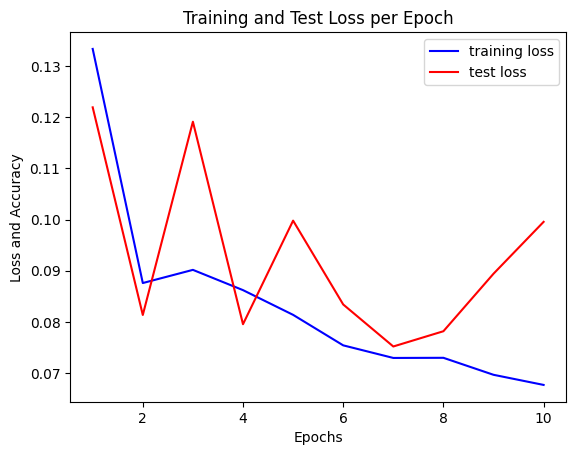

In [ ]:
plt.plot(range(1,len(epoch_losses_train)+1),epoch_losses_train,
         label='training loss',color='blue')
#plt.plot(range(1,len(epoch_accuracy_train)+1),epoch_accuracy_train,
#         label='training accuracy',color='orange')

plt.plot(range(1,len(epoch_losses_test)+1),epoch_losses_test,
         label='test loss',color='red')

#plt.plot(range(1,len(epoch_accuracy_test)+1),epoch_accuracy_test,
#         label='test accuracy',color='green')

plt.title("Training and Test Loss per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss and Accuracy")
plt.legend()
plt.show()

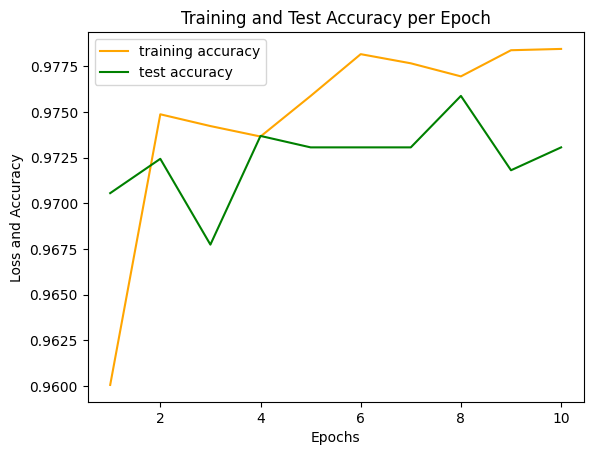

In [ ]:
#plt.plot(range(1,len(epoch_losses_train)+1),epoch_losses_train,
#         label='training loss',color='blue')
plt.plot(range(1,len(epoch_accuracy_train)+1),epoch_accuracy_train,
         label='training accuracy',color='orange')

#plt.plot(range(1,len(epoch_losses_test)+1),epoch_losses_test,
#         label='test loss',color='red')

plt.plot(range(1,len(epoch_accuracy_test)+1),epoch_accuracy_test,
         label='test accuracy',color='green')

plt.title("Training and Test Accuracy per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss and Accuracy")
plt.legend()
plt.show()

## MobileNet V3 Large

In [78]:
# Define the model
model = models.mobilenet_v3_large(pretrained=True)

#num_features = mobilenetv3_model.fc.in_features
#mobilenetv3_model.fc = nn.Linear(num_features, 1)  # Binary classification

# Replace the classifier layer for binary classification
num_features = model.classifier[0].in_features #0
model.classifier = nn.Sequential(
    nn.Linear(num_features, 1)  # Binary classification
)


# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
print("Using: ", device)




/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth
100%|██████████| 21.1M/21.1M [00:00<00:00, 141MB/s]


Using:  cuda


In [79]:
# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
summary(model,input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 112, 112]             432
       BatchNorm2d-2         [-1, 16, 112, 112]              32
         Hardswish-3         [-1, 16, 112, 112]               0
            Conv2d-4         [-1, 16, 112, 112]             144
       BatchNorm2d-5         [-1, 16, 112, 112]              32
              ReLU-6         [-1, 16, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             256
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 64, 112, 112]           1,024
      BatchNorm2d-11         [-1, 64, 112, 112]             128
             ReLU-12         [-1, 64, 112, 112]               0
           Conv2d-13           [-1, 64, 56, 56]             576
      BatchNorm2d-14           [-1, 64,

In [80]:
# Training loop
num_epochs = 10

epoch_losses_train = []
epoch_accuracy_train = []
epoch_losses_test=[]
epoch_accuracy_test=[]


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    skips_per_epoch = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device).float()

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs.squeeze(), labels)
        #loss = criterion(outputs, labels)

        # Ensure labels have the shape [batch_size, 1]
        #loss = criterion(outputs, labels.unsqueeze(1))

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

        # Calculate accuracy
        predicted = (torch.sigmoid(outputs.squeeze()) > 0.5).float()
        #predicted = (torch.sigmoid(outputs) > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        #correct += (predicted == labels.unsqueeze(1)).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct / total
    epoch_losses_train.append(epoch_loss)
    epoch_accuracy_train.append(epoch_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')


    # Evaluation loop
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0



    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).float()

            outputs = model(images)
            loss = criterion(outputs.squeeze(), labels)
            #loss = criterion(outputs, labels.unsqueeze(1))

            val_loss += loss.item() * images.size(0)

            predicted = (torch.sigmoid(outputs.squeeze()) > 0.5).float()
            #predicted = (torch.sigmoid(outputs) > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            #correct += (predicted == labels.unsqueeze(1)).sum().item()


    val_loss = val_loss / len(val_loader.dataset)
    accuracy = correct / total
    epoch_losses_test.append(val_loss)
    epoch_accuracy_test.append(accuracy)
    print(f'Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}')


TypeError: expected Tensor as element 25 in argument 0, but got NoneType

In [ ]:
print(len(epoch_losses_train))
print(len(epoch_losses_test))

In [ ]:
plt.plot(range(1,len(epoch_losses_train)+1),epoch_losses_train,
         label='training loss',color='blue')
#plt.plot(range(1,len(epoch_accuracy_train)+1),epoch_accuracy_train,
#         label='training accuracy',color='orange')

plt.plot(range(1,len(epoch_losses_test)+1),epoch_losses_test,
         label='test loss',color='red')

#plt.plot(range(1,len(epoch_accuracy_test)+1),epoch_accuracy_test,
#         label='test accuracy',color='green')

plt.title("MobileNet V3: Training and Test Loss per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss and Accuracy")
plt.legend()
plt.show()

In [ ]:
#plt.plot(range(1,len(epoch_losses_train)+1),epoch_losses_train,
#         label='training loss',color='blue')
plt.plot(range(1,len(epoch_accuracy_train)+1),epoch_accuracy_train,
         label='training accuracy',color='orange')

#plt.plot(range(1,len(epoch_losses_test)+1),epoch_losses_test,
#         label='test loss',color='red')

plt.plot(range(1,len(epoch_accuracy_test)+1),epoch_accuracy_test,
         label='test accuracy',color='green')

plt.title("MobileNet V3: Training and Test Accuracy per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss and Accuracy")
plt.legend()
plt.show()

## EfficientNet V2 Large

In [ ]:
# Define the model
model = models.efficientnet_v2_l(pretrained=True)

#num_features = mobilenetv3_model.fc.in_features
#mobilenetv3_model.fc = nn.Linear(num_features, 1)  # Binary classification

# Replace the classifier layer for binary classification
num_features = model.classifier[1].in_features #0
model.classifier = nn.Sequential(
    nn.Dropout(p=0.2,inplace=True)
    nn.Linear(num_features, 1)  # Binary classification
)


# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
print("Using: ", device)




In [ ]:
# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
summary(model,input_size=(3,224,224))

In [ ]:
# Training loop
num_epochs = 10

epoch_losses_train = []
epoch_accuracy_train = []
epoch_losses_test=[]
epoch_accuracy_test=[]


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    skips_per_epoch = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device).float()

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs.squeeze(), labels)
        #loss = criterion(outputs, labels)

        # Ensure labels have the shape [batch_size, 1]
        #loss = criterion(outputs, labels.unsqueeze(1))

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

        # Calculate accuracy
        predicted = (torch.sigmoid(outputs.squeeze()) > 0.5).float()
        #predicted = (torch.sigmoid(outputs) > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        #correct += (predicted == labels.unsqueeze(1)).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct / total
    epoch_losses_train.append(epoch_loss)
    epoch_accuracy_train.append(epoch_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')


    # Evaluation loop
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0



    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).float()

            outputs = model(images)
            loss = criterion(outputs.squeeze(), labels)
            #loss = criterion(outputs, labels.unsqueeze(1))

            val_loss += loss.item() * images.size(0)

            predicted = (torch.sigmoid(outputs.squeeze()) > 0.5).float()
            #predicted = (torch.sigmoid(outputs) > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            #correct += (predicted == labels.unsqueeze(1)).sum().item()


    val_loss = val_loss / len(val_loader.dataset)
    accuracy = correct / total
    epoch_losses_test.append(val_loss)
    epoch_accuracy_test.append(accuracy)
    print(f'Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}')


In [ ]:
print(len(epoch_losses_train))
print(len(epoch_losses_test))

In [ ]:
plt.plot(range(1,len(epoch_losses_train)+1),epoch_losses_train,
         label='training loss',color='blue')
#plt.plot(range(1,len(epoch_accuracy_train)+1),epoch_accuracy_train,
#         label='training accuracy',color='orange')

plt.plot(range(1,len(epoch_losses_test)+1),epoch_losses_test,
         label='test loss',color='red')

#plt.plot(range(1,len(epoch_accuracy_test)+1),epoch_accuracy_test,
#         label='test accuracy',color='green')

plt.title("EfficientNet V2: Training and Test Loss per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
#plt.plot(range(1,len(epoch_losses_train)+1),epoch_losses_train,
#         label='training loss',color='blue')
plt.plot(range(1,len(epoch_accuracy_train)+1),epoch_accuracy_train,
         label='training accuracy',color='orange')

#plt.plot(range(1,len(epoch_losses_test)+1),epoch_losses_test,
#         label='test loss',color='red')

plt.plot(range(1,len(epoch_accuracy_test)+1),epoch_accuracy_test,
         label='test accuracy',color='green')

plt.title("EfficientNet V2: Training and Test Accuracy per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Custom CNN Pytorch (failed)

In [ ]:
#define custom cnn
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        #self.conv1 = nn.Conv2d(3, 32, kernel_size=3, activation='relu')
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        #self.conv2 = nn.Conv2d(32, 64, kernel_size=7, activation='relu')
        self.conv2 = nn.Conv2d(32, 64, kernel_size=7)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        #self.conv3 = nn.Conv2d(64, 128, kernel_size=7, activation='relu')
        self.conv3 = nn.Conv2d(64, 128, kernel_size=7)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        #self.conv4 = nn.Conv2d(128, 256, kernel_size=7, activation='relu')
        self.conv4 = nn.Conv2d(128, 256, kernel_size=7)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(16384, 1)  # Adjust the input dimension based on your input size
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.pool3(x)
        x = F.relu(self.conv4(x))
        x = self.pool4(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.sigmoid(x)
        return x


In [ ]:
summary(custom_model,input_size=(3,224,224))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x173056 and 3211264x1)

In [ ]:
#setup model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
custom_model = CustomCNN().to(device)
criterion = nn.BCELoss()
optimizer = optim.RMSprop(custom_model.parameters())

epoch_losses_train_custom = []
epoch_accuracy_train_custom = []

# Training loop
num_epochs = 6
for epoch in range(num_epochs):
    custom_model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device).float().view(-1, 1)
        optimizer.zero_grad()
        outputs = custom_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate accuracy
        predicted = (torch.sigmoid(outputs.squeeze()) > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct / total
    epoch_losses_train_custom.append(epoch_loss)
    epoch_accuracy_train_custom.append(epoch_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}')

print('Training complete')


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x173056 and 3211264x1)

In [ ]:
summary(custom_model,input_size=(3,224,224))

In [ ]:
# Assuming you have a separate validation set
#val_loader = DataLoader(dataset, batch_size=32, shuffle=False)  # Example validation loader

epoch_losses_test_custom = []
epoch_accuracy_test_custom = []

# Evaluation loop
custom_model.eval()
val_loss = 0.0
total = 0
correct = 0
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device).float().view(-1, 1)
        outputs = custom_model(images)
        loss = criterion(outputs, labels)
        val_loss += loss.item()

        predicted = (torch.sigmoid(outputs.squeeze()) > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

val_loss = val_loss / len(val_loader.dataset)
accuracy = correct / total
epoch_losses_test.append(val_loss)
epoch_accuracy_test.append(accuracy)
print(f'Validation Loss: {val_loss/len(val_loader)}')


In [ ]:
plt.plot(range(1,len(epoch_losses_train_custom)+1),epoch_losses_train_custom,
         label='training loss',color='blue')
#plt.plot(range(1,len(epoch_accuracy_train)+1),epoch_accuracy_train,
#         label='training accuracy',color='orange')

plt.plot(range(1,len(epoch_losses_test_custom)+1),epoch_losses_test_custom,
         label='test loss',color='red')

#plt.plot(range(1,len(epoch_accuracy_test)+1),epoch_accuracy_test,
#         label='test accuracy',color='green')

plt.title("Training and Test Loss per Epoch: Custo CNN")
plt.xlabel("Epochs")
plt.ylabel("Loss and Accuracy")
plt.legend()
plt.show()

In [ ]:
#plt.plot(range(1,len(epoch_losses_train)+1),epoch_losses_train,
#         label='training loss',color='blue')
plt.plot(range(1,len(epoch_accuracy_train_custom)+1),epoch_accuracy_train_custom,
         label='training accuracy',color='orange')

#plt.plot(range(1,len(epoch_losses_test)+1),epoch_losses_test,
#         label='test loss',color='red')

plt.plot(range(1,len(epoch_accuracy_test_custom)+1),epoch_accuracy_test_custom,
         label='test accuracy',color='green')

plt.title("Training and Test Accuracy per Epoch: Custom CNN")
plt.xlabel("Epochs")
plt.ylabel("Loss and Accuracy")
plt.legend()
plt.show()

## Custom CNN keras (failed)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from PIL import Image
import torchvision.transforms as transforms

In [ ]:
custom_model = Sequential()
custom_model.add( Conv2D(32,kernel_size=3,activation='relu',input_shape=(224,224,3)))
custom_model.add(MaxPooling2D())
#model.add(Flatten())
custom_model.add( Conv2D(64,kernel_size=7,activation='relu'))
custom_model.add(MaxPooling2D())
custom_model.add( Conv2D(128,kernel_size=7,activation='relu'))
custom_model.add(MaxPooling2D())
custom_model.add( Conv2D(256,kernel_size=7,activation='relu'))
custom_model.add(MaxPooling2D())
custom_model.add(Flatten())
custom_model.add(Dense(1,activation='sigmoid'))
custom_model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')


In [ ]:
custom_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 105, 105, 64)      100416    
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 52, 52, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 46, 46, 128)       401536    
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 23, 23, 128)      

In [ ]:
class CustomDataGen(tf.keras.utils.Sequence):
    def __init__(self, dataloader):
        self.dataloader = dataloader

    def __len__(self):
        return len(self.dataloader)

    def __getitem__(self, idx):
        batch = self.dataloader[idx]
        images, labels = zip(*batch)
        return np.array(images), np.array(labels)

#train_gen = CustomDataGen(train_loader)

# Train the model
#custom_model.fit(train_gen, epochs=10, steps_per_epoch=len(train_gen))


TypeError: 'DataLoader' object is not subscriptable

In [ ]:
#custom_model.fit(train_loader, epochs=10)

ValueError: Failed to find data adapter that can handle input: <class 'torch.utils.data.dataloader.DataLoader'>, <class 'NoneType'>

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    #Enter your parameters
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0

)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    #Enter your paramaters
    filepath='best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    verbose=0
)